# Part II - Ford Go Bike
## by Oladayo Oladipupo


## Investigation Overview


> The key goal of this investigation is to figure out the key factor that causes longer duration by the bikers. Alot of investigations were done using the gender and user type data as a key factor. 


## Dataset Overview

> This dataset represents trips taken by members of the service for month of February of 2019. It contains info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgo = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
# convert the datatype of date to timestamp
fordgo.start_time = pd.to_datetime(fordgo['start_time'])
fordgo.end_time = pd.to_datetime(fordgo['end_time'])

In [4]:
# convert duration from per seconds to per minutes

fordgo['duration_min'] = round(fordgo['duration_sec']/60 , 2)

In [5]:
#create member age as at 2019 column

fordgo['member_age'] = 2019 - fordgo['member_birth_year']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The Average Trip in Minutes by the Bikers

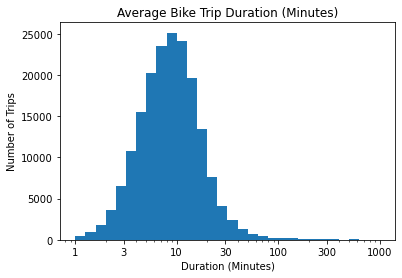

In [6]:
#Let's put it into log scale for better look at the distrubtion
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(data = fordgo , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

## Age Distribution of Users

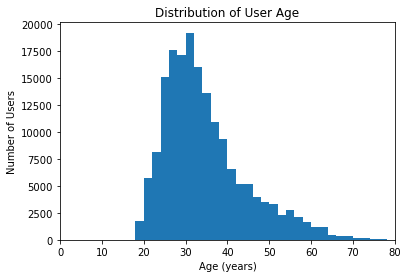

In [7]:
# The age distribution derived from member's birth year.
bin_size = 2
bins = np.arange(0, fordgo['member_age'].max()+ bin_size, bin_size)
plt.hist(data = fordgo.dropna(), x = 'member_age', bins = bins)
plt.xlim(0,80)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

## Gender Distribution of users



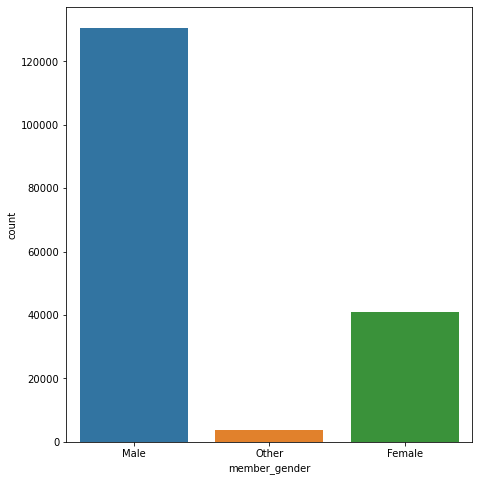

In [8]:
#The distrubtion of the riders based on gender
plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,1)
sb.countplot(data = fordgo , x = 'member_gender' );

## Looking at the correlation between the trip duration and gender.

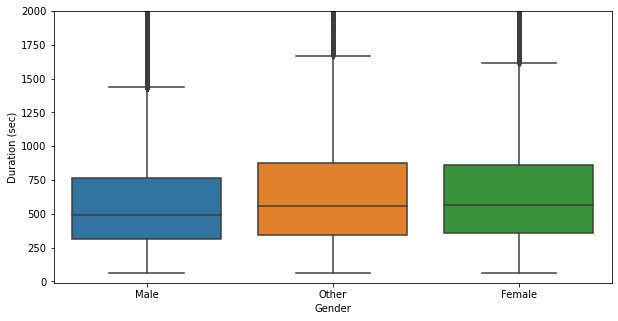

In [9]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = fordgo, x = 'member_gender', y = 'duration_sec')
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)');

## Which gender takes more rides compared to their age

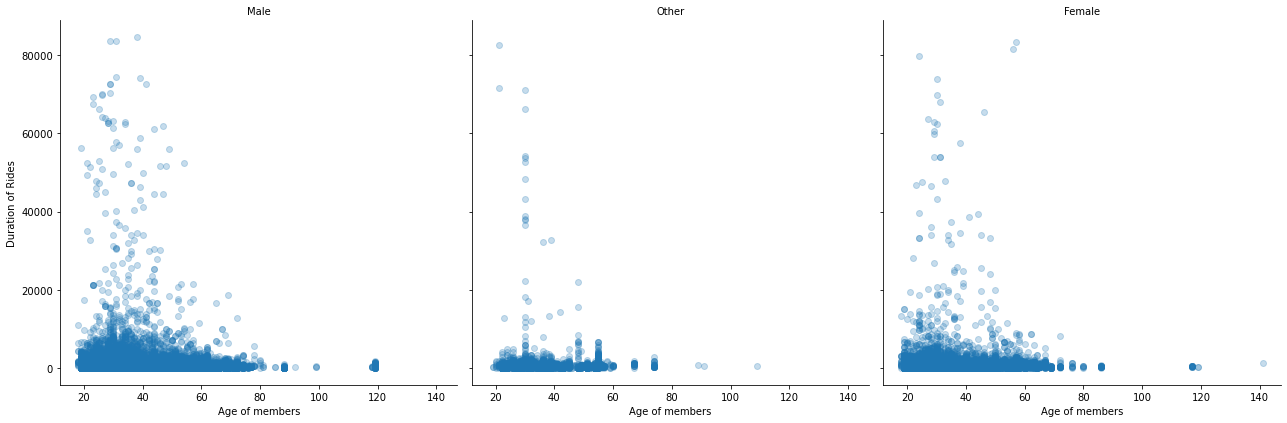

In [10]:
g = sb.FacetGrid(data = fordgo, col = 'member_gender', height = 6,
                 col_wrap = 3)
g.map(sb.regplot, 'member_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of members')
g.set_titles('{col_name}');

In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 582740 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\olada\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\olada\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\olada\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\olada\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\olada\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "